# Day 5 lunch exercise

## Load packages and data

In [137]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy import stats
import statsmodels.formula.api as smf
import statsmodels.api as sm
import math

In [4]:
df_offspring = pd.read_csv('aau1043_dnm.tsv')
df_offspring

,Chr,Pos,Ref,Alt,Proband_id,Phase_combined,Crossover,Sanger
0,chr1,241097646,C,T,99379,father,paternal_crossover,confirmed
1,chr10,29202943,A,G,8147,father,maternal_crossover,PCR failed
2,chr11,129441657,C,T,5410,mother,maternal_crossover,confirmed
3,chr13,96867147,A,G,46025,father,paternal_crossover,confirmed
4,chr17,50609998,C,T,144769,mother,maternal_crossover,confirmed
...,...,...,...,...,...,...,...,...
26426,chr9,137374330,C,T,54383,father,NaN,NaN
26427,chr9,137396508,C,T,39729,father,NaN,NaN
26428,chr9,137633973,C,A,17904,mother,NaN,NaN
26429,chr9,137889777,G,A,80108,father,NaN,NaN


In [5]:
df_parent = pd.read_csv('aau1043_parental_age.tsv')
df_parent

,Proband_id,Father_age,Mother_age
0,675,31,36
1,1097,19,19
2,1230,30,28
3,1481,32,20
4,1806,38,34
...,...,...,...
391,153657,27,23
392,154565,36,30
393,154621,19,18
394,154810,32,28


## Count dnms from both parents

In [31]:
dnm = dict()
dnm

{}

In [32]:
for row in range(df_offspring.shape[0]):
    Proband_id = df_offspring.loc[row, 'Proband_id']
    dnm.setdefault(Proband_id, [0, 0, 0])
    if df_offspring.loc[row, 'Phase_combined'] == 'father':
        dnm[Proband_id][0] += 1
        dnm[Proband_id][2] += 1
    elif df_offspring.loc[row, 'Phase_combined'] == 'mother':
        dnm[Proband_id][1] += 1
        dnm[Proband_id][2] += 1
    else:
        dnm[Proband_id][2] += 1

df_dnm

{99379: [38, 8, 47],
 8147: [78, 27, 114],
 5410: [52, 16, 70],
 46025: [40, 11, 52],
 144769: [49, 13, 63],
 4131: [39, 17, 59],
 24464: [66, 7, 73],
 104665: [42, 18, 60],
 5494: [53, 9, 64],
 102060: [53, 8, 61],
 132388: [43, 10, 56],
 13542: [59, 8, 69],
 130811: [38, 11, 54],
 136354: [49, 12, 64],
 120117: [34, 13, 52],
 70975: [61, 21, 84],
 146353: [75, 16, 96],
 104502: [57, 11, 68],
 80905: [75, 14, 97],
 3723: [61, 9, 73],
 34291: [58, 21, 83],
 142888: [54, 20, 85],
 32514: [74, 26, 101],
 55462: [82, 18, 104],
 61747: [38, 14, 52],
 91198: [55, 6, 62],
 9165: [52, 10, 64],
 79709: [72, 6, 81],
 112510: [55, 16, 74],
 25400: [64, 8, 73],
 141757: [52, 10, 73],
 49640: [46, 10, 60],
 94281: [50, 11, 65],
 64417: [35, 5, 41],
 13191: [78, 31, 111],
 139512: [48, 11, 62],
 104596: [42, 12, 57],
 29874: [74, 28, 103],
 85117: [62, 14, 77],
 117135: [57, 11, 68],
 119874: [39, 9, 48],
 143074: [62, 19, 81],
 54944: [46, 12, 62],
 133117: [39, 19, 58],
 22442: [45, 12, 59],
 831

In [37]:
df_dnm = {'Proband_id':[], 'Pat_dnm':[], 'Mat_dnm':[], 'Tot_dnm':[]}
for each in dnm.keys():
    df_dnm['Proband_id'].append(each)
    df_dnm['Pat_dnm'].append(dnm[each][0])
    df_dnm['Mat_dnm'].append(dnm[each][1])
    df_dnm['Tot_dnm'].append(dnm[each][2])
df_dnm = pd.DataFrame(df_dnm)
df_dnm

,Proband_id,Pat_dnm,Mat_dnm,Tot_dnm
0,99379,38,8,47
1,8147,78,27,114
2,5410,52,16,70
3,46025,40,11,52
4,144769,49,13,63
...,...,...,...,...
391,36485,44,7,51
392,19715,40,9,52
393,131854,48,7,58
394,67028,31,7,38


In [38]:
df_all = pd.merge(df_dnm, df_parent)
df_all

,Proband_id,Pat_dnm,Mat_dnm,Tot_dnm,Father_age,Mother_age
0,99379,38,8,47,24,21
1,8147,78,27,114,40,33
2,5410,52,16,70,27,18
3,46025,40,11,52,21,23
4,144769,49,13,63,22,19
...,...,...,...,...,...,...
391,36485,44,7,51,32,19
392,19715,40,9,52,27,25
393,131854,48,7,58,31,19
394,67028,31,7,38,23,25


## Plot mutation counts to parents' age

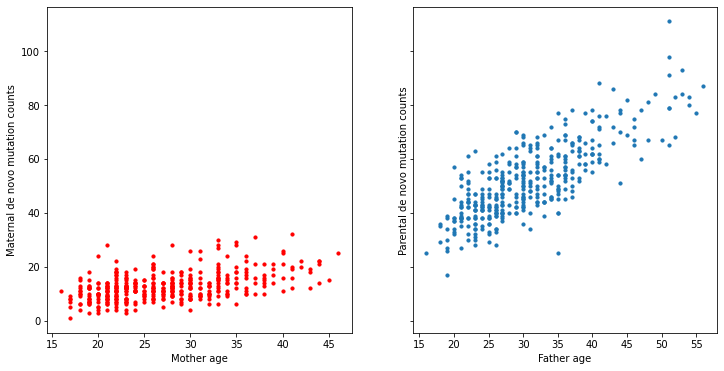

In [61]:
fig, ax = plt.subplots(ncols = 2, sharey = True, figsize = ((12,6)))
ax[0].scatter(df_all['Mother_age'], df_all['Mat_dnm'], color = 'r', s = 10)
ax[0].set_xlabel('Mother age')
ax[0].set_ylabel('Maternal de novo mutation counts')
ax[1].scatter(df_all['Father_age'], df_all['Pat_dnm'], s = 10)
ax[1].set_xlabel('Father age')
ax[1].set_ylabel('Parental de novo mutation counts')
plt.show()

## Linear regression of maternal dnms to mother age

In [63]:
model_mat = smf.ols(formula = "Mat_dnm ~ 1 + Mother_age", data = df_all)
results_mat = model_mat.fit()
results_mat.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Mat_dnm   R-squared:                       0.228
Model:                            OLS   Adj. R-squared:                  0.226
Method:                 Least Squares   F-statistic:                     116.0
Date:                Sat, 05 Sep 2020   Prob (F-statistic):           6.88e-24
Time:                        14:19:37   Log-Likelihood:                -1158.1
No. Observations:                 396   AIC:                             2320.
Df Residuals:                     394   BIC:                             2328.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.5040      0.981      2.553      0.011       0.576       4.432
Mother_age     0.3776      0.035     10.772      0.000       0.309       0.446
==============================================================================
Omnibus:                       51.143   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               75.501
Skew:                           0.845   Prob(JB):                     4.03e-17
Kurtosis:                       4.310   Cond. No.                         121.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Linear regression of paternal dnms to father age

In [141]:
model_pat = smf.ols(formula = "Pat_dnm ~ 1 + Father_age", data = df_all)
results_pat = model_pat.fit()
results_pat.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Pat_dnm   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                     639.6
Date:                Sat, 05 Sep 2020   Prob (F-statistic):           1.55e-84
Time:                        15:27:45   Log-Likelihood:                -1406.6
No. Observations:                 396   AIC:                             2817.
Df Residuals:                     394   BIC:                             2825.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.3263      1.702      6.066      0.000       6.979      13.673
Father_age     1.3538      0.054     25.291      0.000       1.249       1.459
==============================================================================
Omnibus:                        7.687   Durbin-Watson:                   1.821
Prob(Omnibus):                  0.021   Jarque-Bera (JB):                8.185
Skew:                           0.256   Prob(JB):                       0.0167
Kurtosis:                       3.483   Cond. No.                         127.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Seems that both maternal and paternal age affect inherited dnm counts in offsprings with statistic significance, but paternal age exerts greater effect on the inherited dnm counts than maternal age, indicated by a larger coefficient.
#### This is probably due to the active and continuous proliferation spermatogonia stem cells which may introduce more mutations into sperms over time, compared with oocytes.

## Plot the distribution of inherited dnms

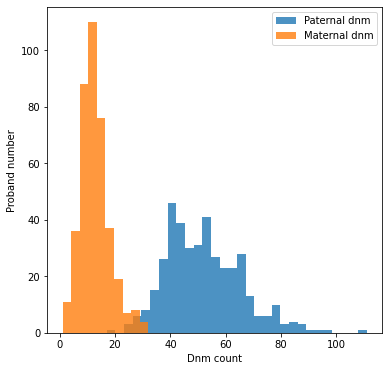

In [83]:
fig, ax = plt.subplots(figsize = ((6, 6)))
ax.hist(df_all['Pat_dnm'], bins = 30, alpha = 0.8, label = 'Paternal dnm')
ax.hist(df_all['Mat_dnm'], bins = 10, alpha = 0.8, label = 'Maternal dnm')
ax.set_xlabel('Dnm count')
ax.set_ylabel('Proband number')
ax.legend()

## T-test of paternal and maternal dnms

In [84]:
stats.ttest_ind(df_all["Pat_dnm"], df_all["Mat_dnm"])

Ttest_indResult(statistic=53.403565287269245, pvalue=2.1986031793078793e-264)

#### Seems that there is significant difference between maternal dnm counts and paternal dnm counts

## Poisson regression of maternal and paternal dnms to parents' age

In [85]:
model_mat_pois = smf.poisson(formula = "Mat_dnm ~ 1 + Mother_age", data = df_all)
results_mat_pois = model_mat_pois.fit()
results_mat_pois.summary()

Optimization terminated successfully.
         Current function value: 2.927974
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Poisson Regression Results                          
==============================================================================
Dep. Variable:                Mat_dnm   No. Observations:                  396
Model:                        Poisson   Df Residuals:                      394
Method:                           MLE   Df Model:                            1
Date:                Sat, 05 Sep 2020   Pseudo R-squ.:                 0.07164
Time:                        14:29:40   Log-Likelihood:                -1159.5
converged:                       True   LL-Null:                       -1248.9
Covariance Type:            nonrobust   LLR p-value:                 8.241e-41
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.7671      0.060     29.235      0.000       1.649       1.886
Mother_age     0.0281      0.002     13.582      0.000       0.024       0.032
==============================================================================
"""

In [86]:
model_pat_pois = smf.poisson(formula = "Pat_dnm ~ 1 + Father_age", data = df_all)
results_pat_pois = model_pat_pois.fit()
results_pat_pois.summary()

Optimization terminated successfully.
         Current function value: 3.578620
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Poisson Regression Results                          
==============================================================================
Dep. Variable:                Pat_dnm   No. Observations:                  396
Model:                        Poisson   Df Residuals:                      394
Method:                           MLE   Df Model:                            1
Date:                Sat, 05 Sep 2020   Pseudo R-squ.:                  0.2277
Time:                        14:30:18   Log-Likelihood:                -1417.1
converged:                       True   LL-Null:                       -1834.9
Covariance Type:            nonrobust   LLR p-value:                1.004e-183
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.1903      0.027    116.856      0.000       3.137       3.244
Father_age     0.0241      0.001     29.608      0.000       0.023       0.026
==============================================================================
"""

## Using Poisson regression to test the difference significance between paternal dnms and maternal dnms

In [143]:
s_dnm_Parental = pd.Series(['Father']*df_dnm.shape[0], name = 'Gender')
s_dnm_Marental = pd.Series(['Mother']*df_dnm.shape[0], name = 'Gender')
df_sex = pd.DataFrame(list(zip(df_dnm['Pat_dnm'], s_dnm_Parental))).append(pd.DataFrame(list(zip(df_dnm['Mat_dnm'], s_dnm_Marental))))
df_sex.columns = ['Dnm', 'Gender']
df_sex

,Dnm,Gender
0,38,Father
1,78,Father
2,52,Father
3,40,Father
4,49,Father
...,...,...
391,7,Mother
392,9,Mother
393,7,Mother
394,7,Mother


In [117]:
model_dnm_pois = smf.poisson(formula = "Dnm ~ 1 + Gender", data = df_sex)
results_dnm_pois = model_dnm_pois.fit()
results_dnm_pois.summary()

Optimization terminated successfully.
         Current function value: 3.893765
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Poisson Regression Results                          
==============================================================================
Dep. Variable:                    Dnm   No. Observations:                  792
Model:                        Poisson   Df Residuals:                      790
Method:                           MLE   Df Model:                            1
Date:                Sat, 05 Sep 2020   Pseudo R-squ.:                  0.6206
Time:                        15:05:05   Log-Likelihood:                -3083.9
converged:                       True   LL-Null:                       -8128.3
Covariance Type:            nonrobust   LLR p-value:                     0.000
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            3.9515      0.007    567.124      0.000       3.938       3.965
Gender[T.Mother]    -1.4036      0.016    -89.467      0.000      -1.434      -1.373
====================================================================================
"""

#### Seems that paternal and maternal dnm counts are significantly different indicated by a small p-value in poisson regression model.

## Predict paternal dnm counts on a new proband

In [118]:
results_pat_pois.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                          Poisson Regression Results                          
==============================================================================
Dep. Variable:                Pat_dnm   No. Observations:                  396
Model:                        Poisson   Df Residuals:                      394
Method:                           MLE   Df Model:                            1
Date:                Sat, 05 Sep 2020   Pseudo R-squ.:                  0.2277
Time:                        15:07:48   Log-Likelihood:                -1417.1
converged:                       True   LL-Null:                       -1834.9
Covariance Type:            nonrobust   LLR p-value:                1.004e-183
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.1903      0.027    116.856      0.000       3.137       3.244
Father_age     0.0241      0.001     29.608      0.000       0.023       0.026
==============================================================================
"""

In [121]:
New_proband = pd.DataFrame({'Father_age': [50.5]})

In [140]:
math.exp(3.1903 + 0.0241 * 50.5)

82.05173803957092

#### The new proband should have 82 paternal dnms based on poisson model.